# QUESTÃO 01 TRABALHO IA
# Laura Menezes Heráclito Alves - 854730

## IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

## Carregamento e Visão Geral dos Dados

In [ ]:
caminho_arquivo = 'creditcard.csv'
df_original = pd.read_csv(caminho_arquivo)

df_trabalho = df_original.copy()

# Remoção imediata da coluna Time (irrelevante para classificação)
if 'Time' in df_trabalho.columns:
    df_trabalho.drop(columns=['Time'], inplace=True)

print(f"Dimensões do dataset: {df_trabalho.shape}")
df_trabalho.head()

Dimensões do dataset: (59511, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Visualização da Base de Dados (EDA)

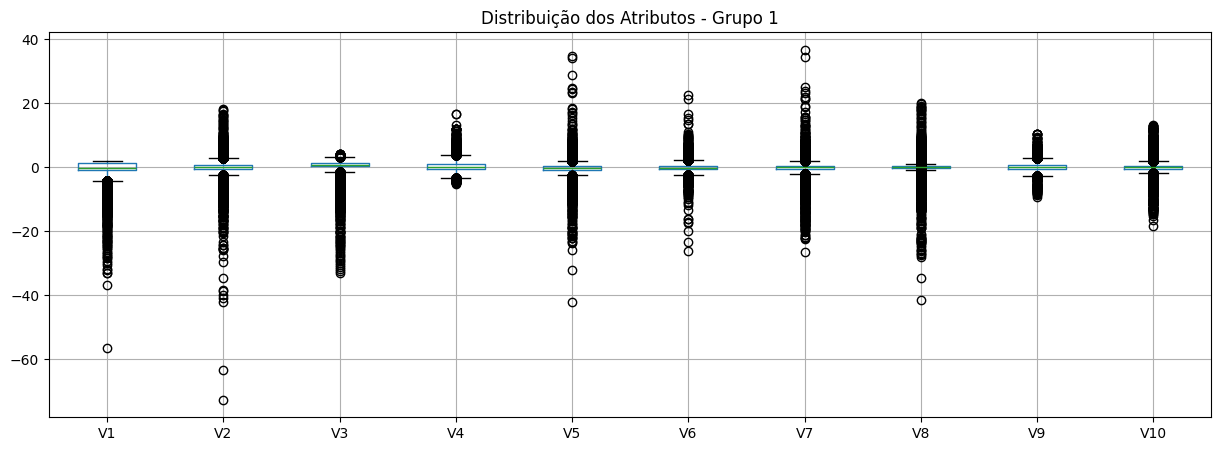

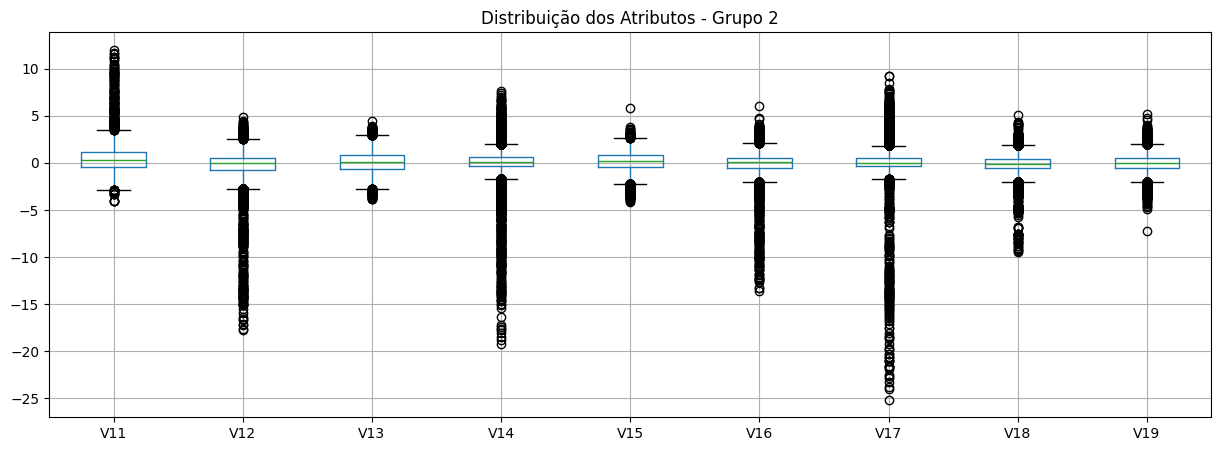

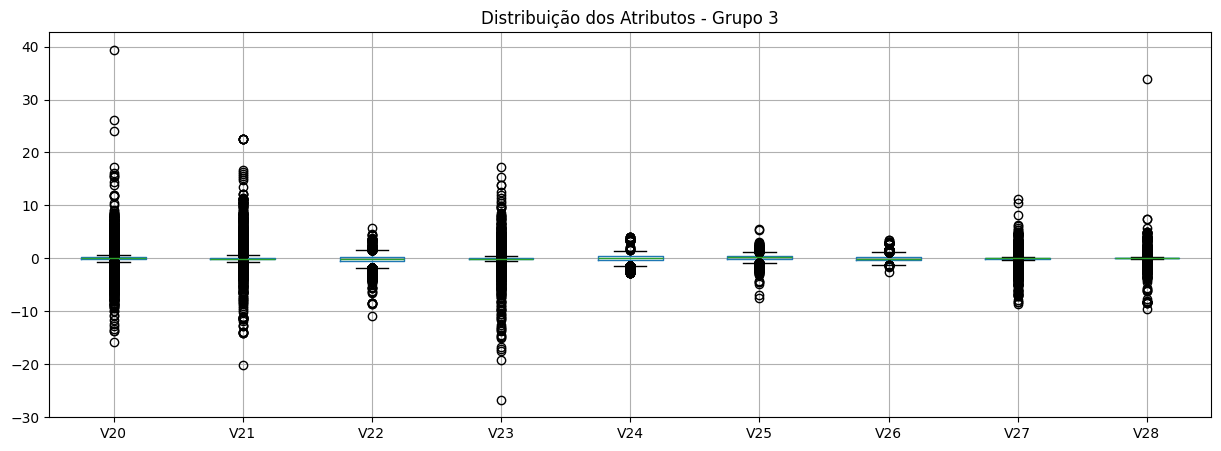

In [ ]:
# Visualização 1: Desbalanceamento de Classes
contagem_classes = df_trabalho['Class'].value_counts().reset_index()
contagem_classes.columns = ['Classe', 'Contagem']
contagem_classes['Rotulo'] = contagem_classes['Classe'].map({0: 'Normal', 1: 'Fraude'})

fig_pizza = px.pie(contagem_classes, values='Contagem', names='Rotulo',
             title='Distribuição das Classes (Normal vs Fraude)',
             color='Rotulo', color_discrete_map={'Normal':'blue', 'Fraude':'red'})
fig_pizza.show()

# Visualização 2: Distribuição do Montante
fig_hist_amount = px.histogram(df_trabalho, x='Amount', nbins=50, title="Distribuição dos Valores das Transações (Amount)")
fig_hist_amount.show()

# Visualização 3: Boxplots dos Atributos V
colunas_v = [c for c in df_trabalho.columns if 'V' in c]

grupos = np.array_split(colunas_v, 3)

for i, grupo in enumerate(grupos):
    fig, ax = plt.subplots(figsize=(15, 5))
    df_trabalho[grupo].boxplot(ax=ax)
    ax.set_title(f"Distribuição dos Atributos - Grupo {i+1}")
    ax.grid(True)
    plt.show()

## Histograma das Colunas V

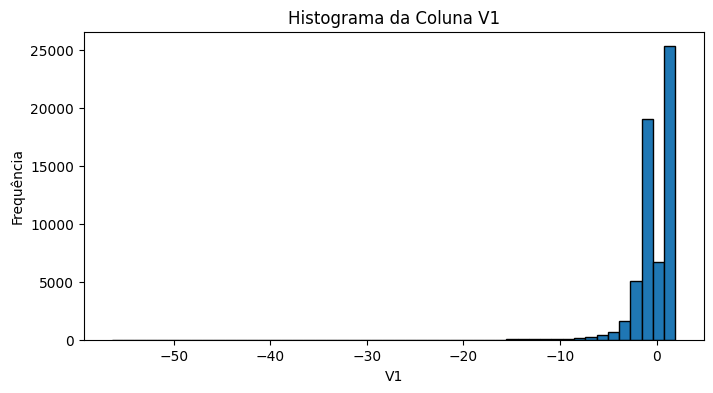

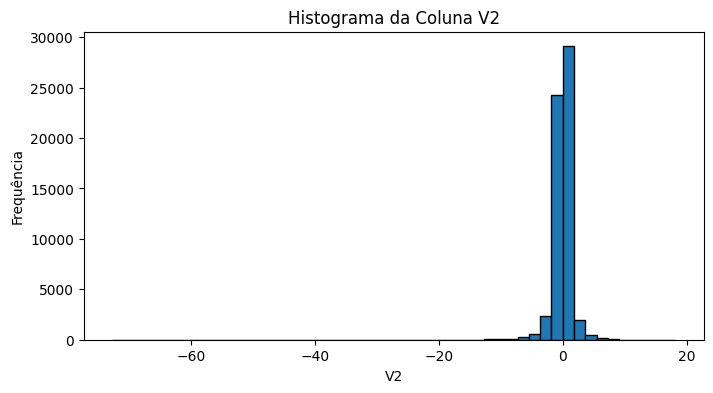

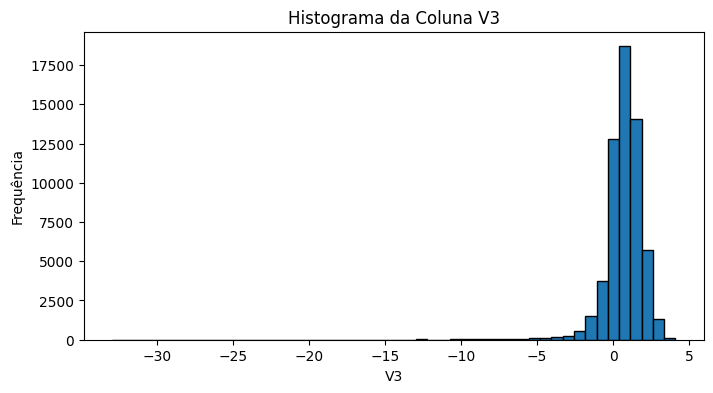

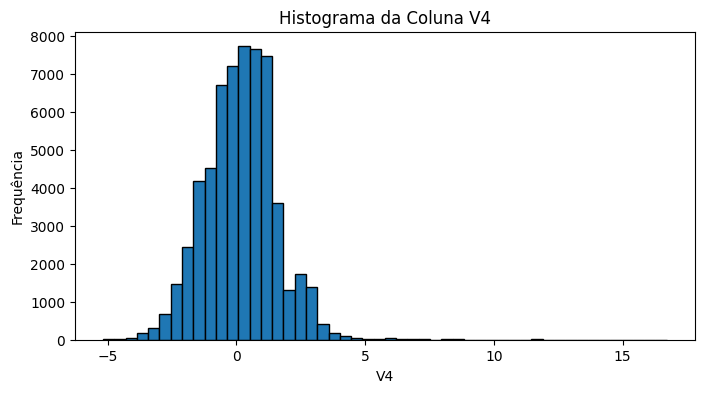

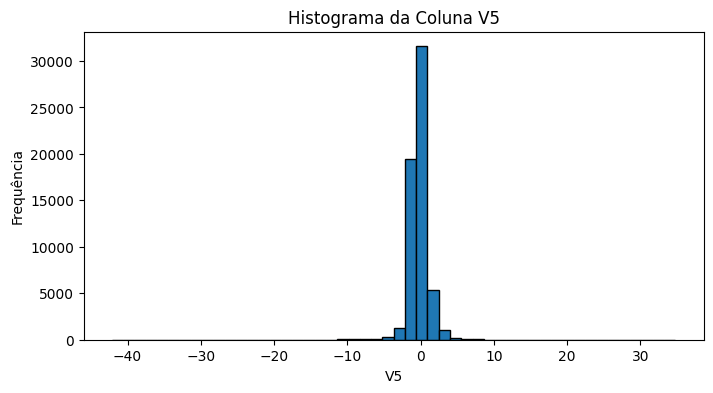

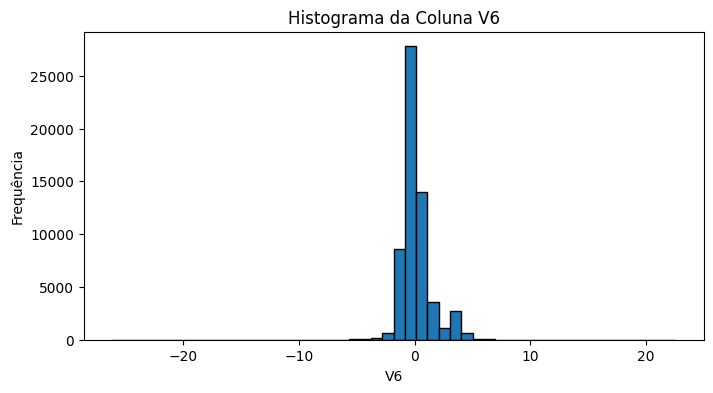

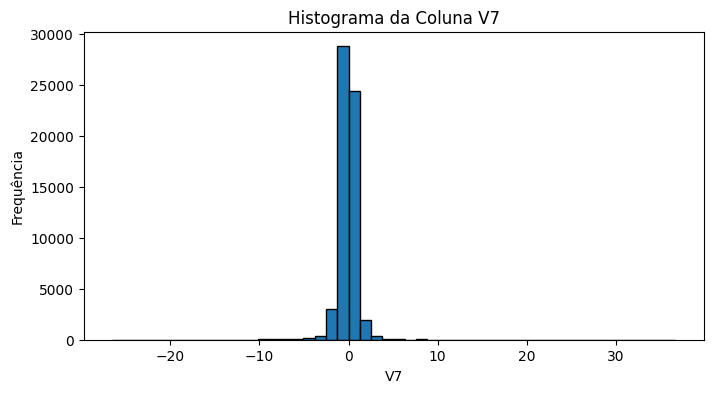

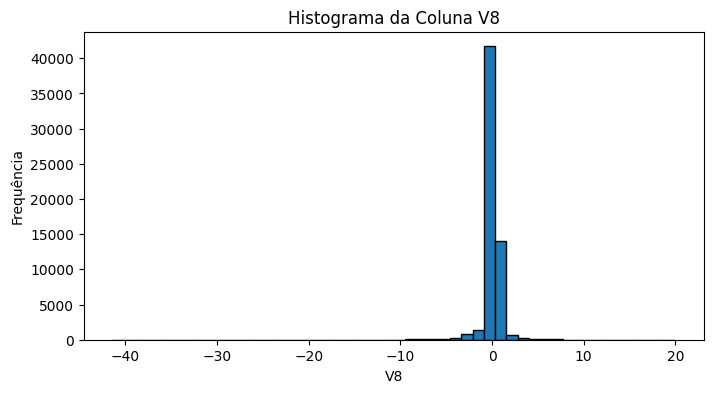

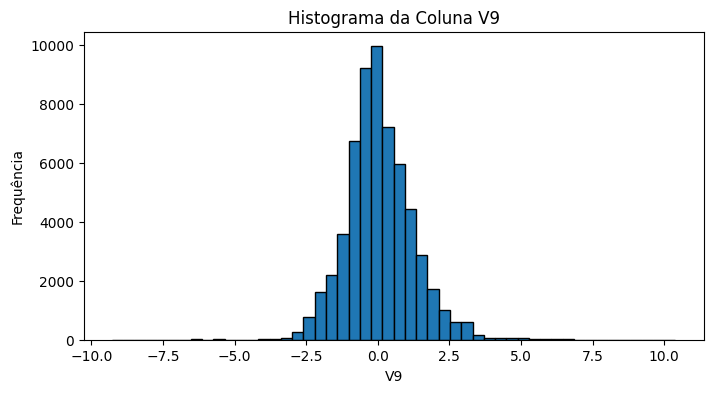

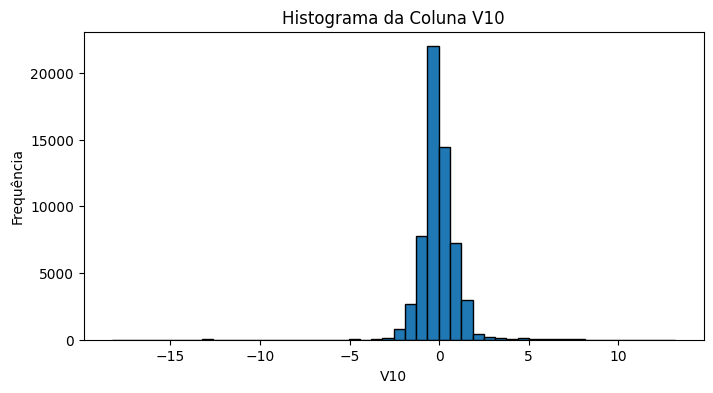

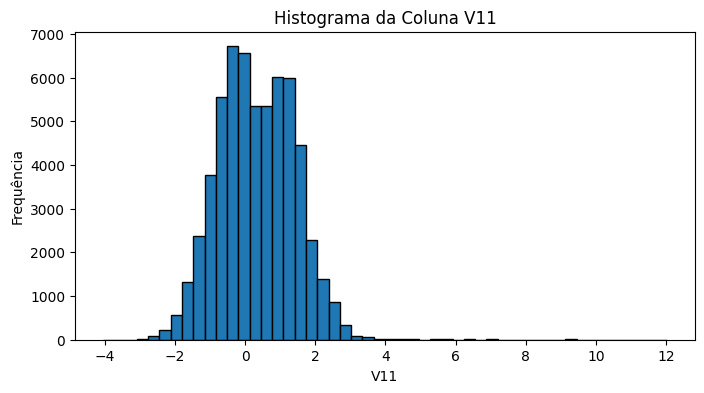

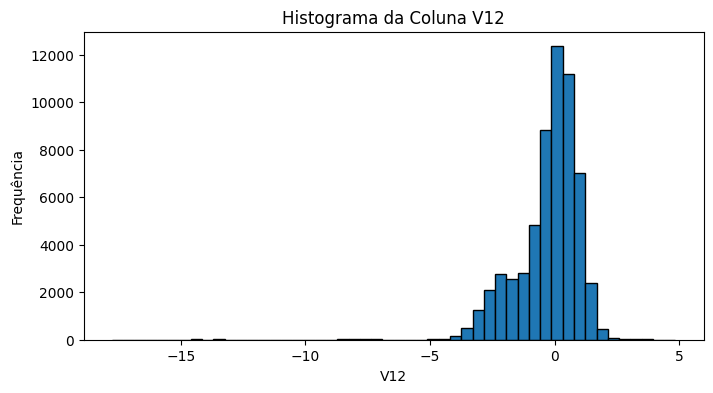

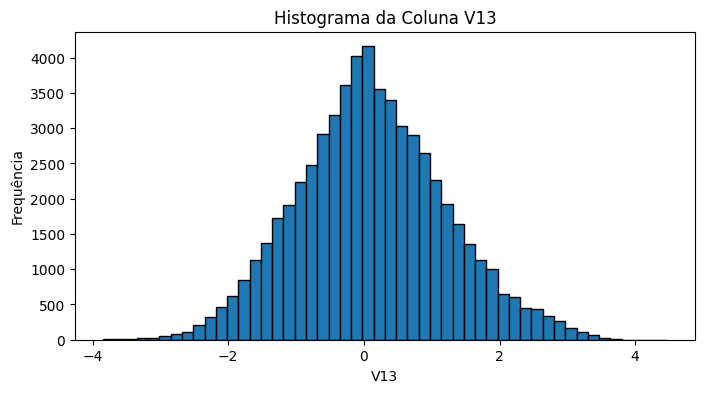

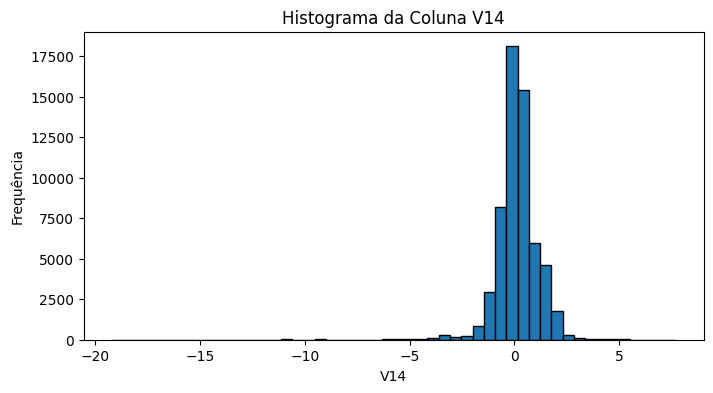

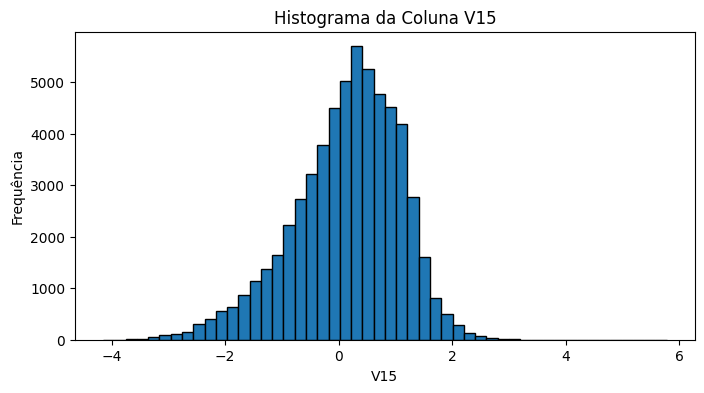

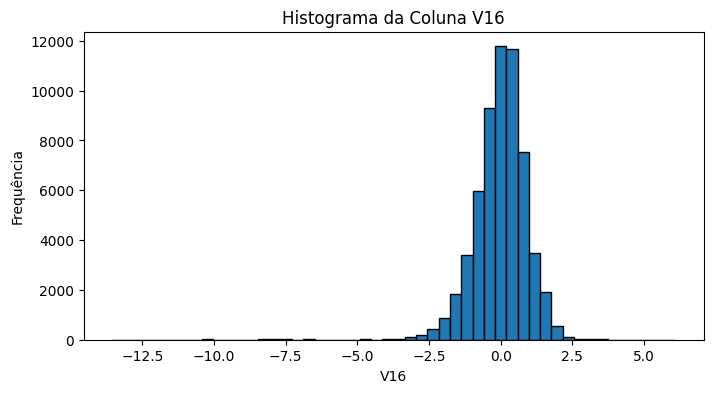

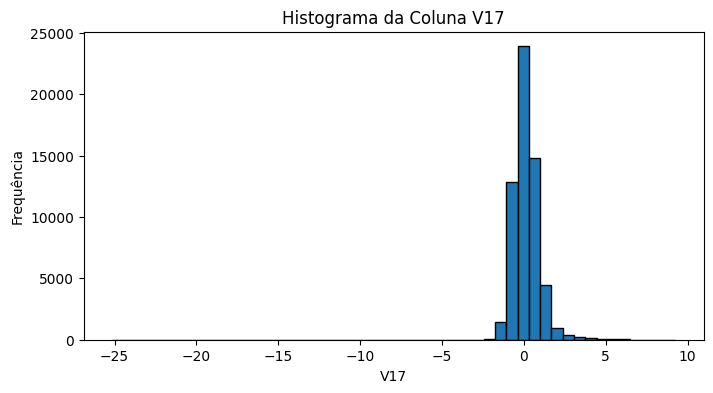

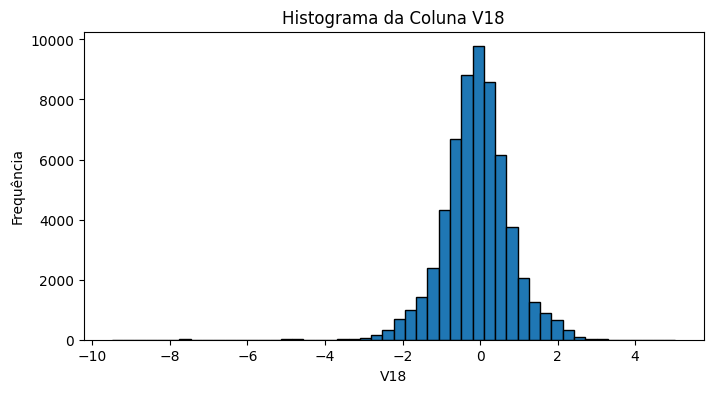

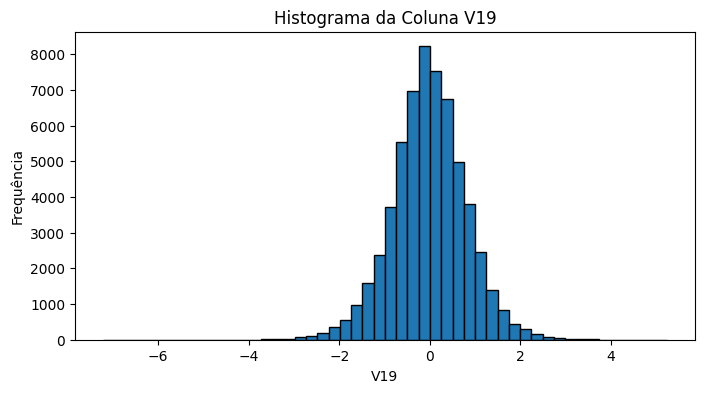

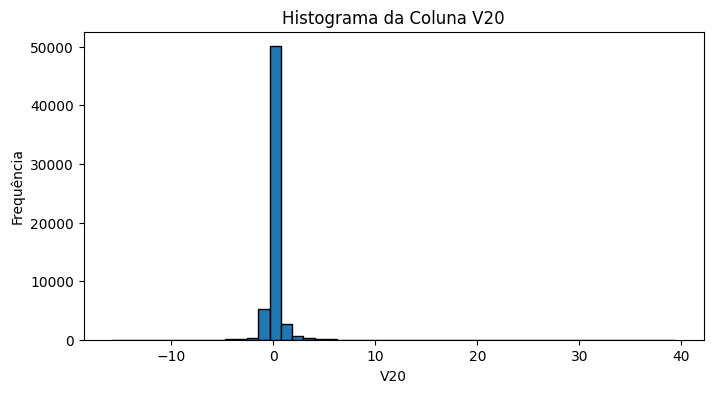

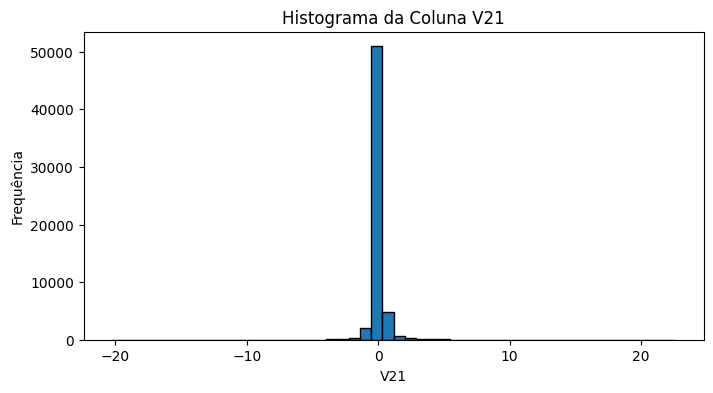

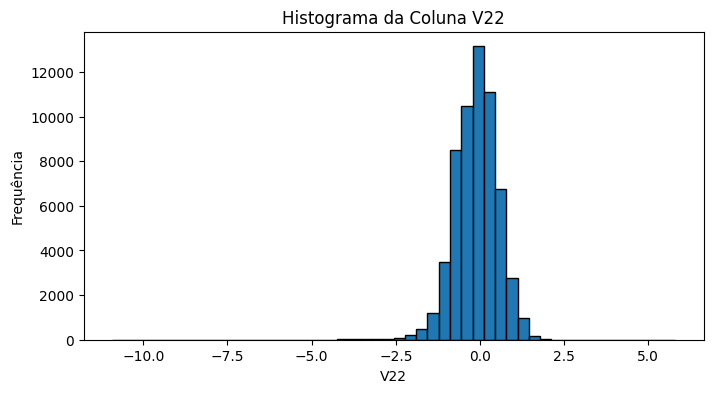

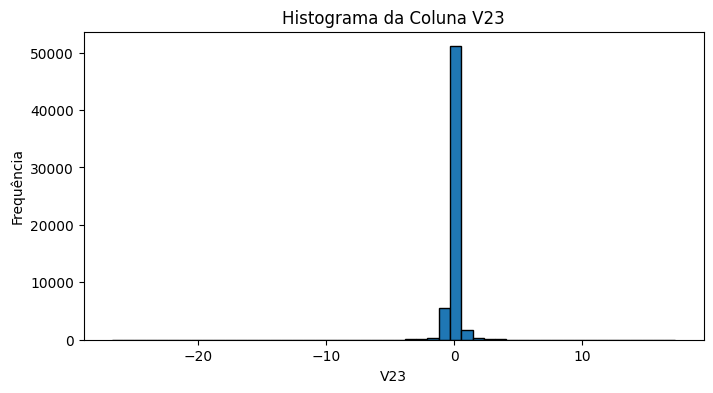

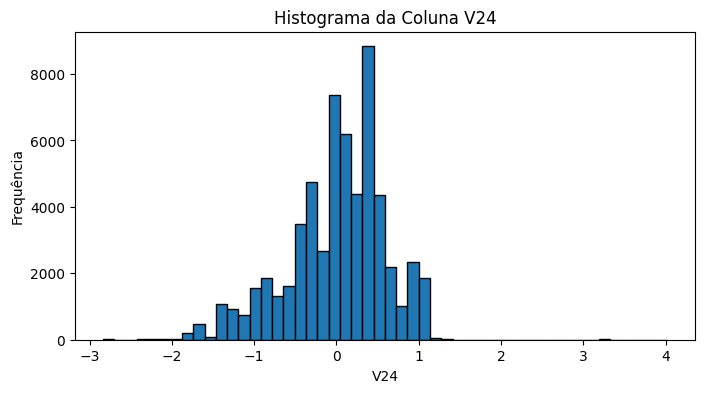

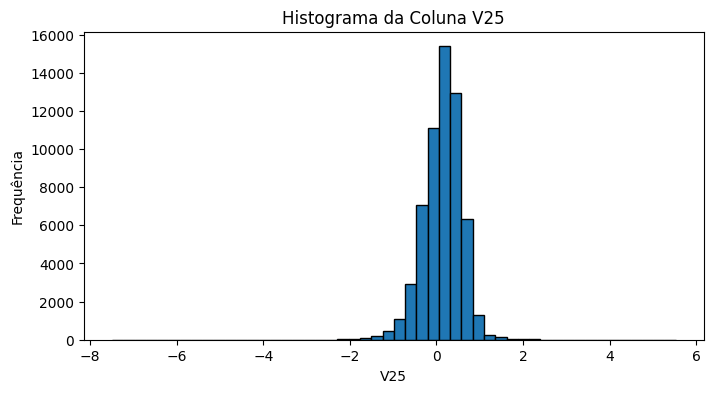

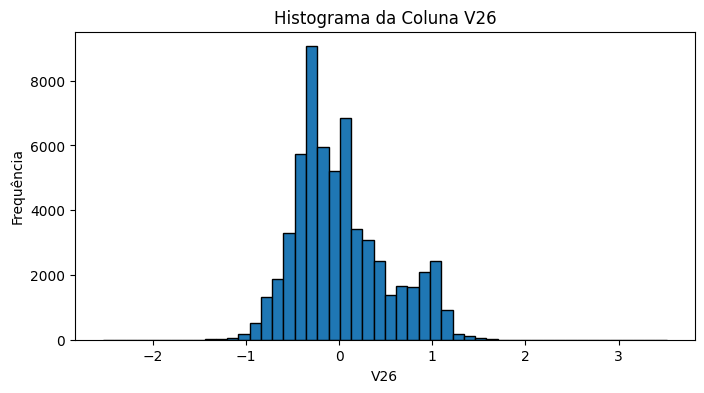

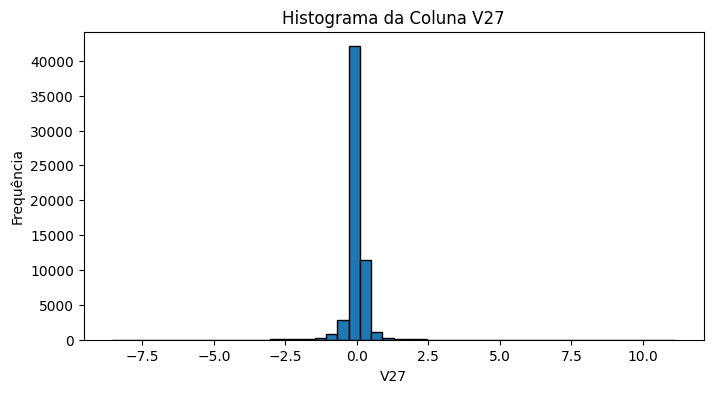

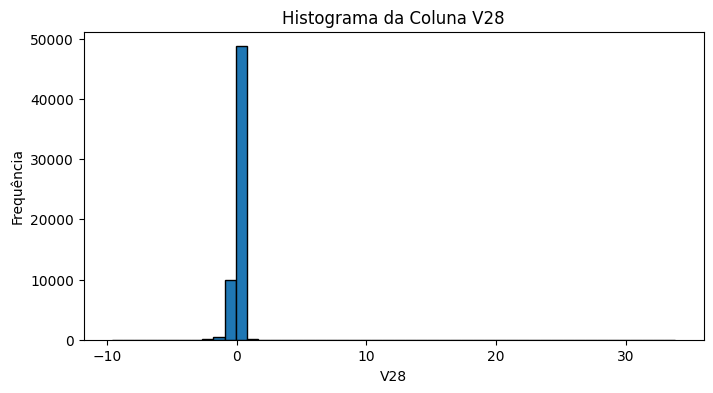

In [ ]:
# OPCIONAL!!! FIZ PARA COMPLETAR VISUALIZAÇÃO
# Tô fazendo só pra visualizar mesmo, pois são 28 gráficos.

colunas_v = [c for c in df_trabalho.columns if 'V' in c]

for coluna in colunas_v:
    plt.figure(figsize=(8, 4))
    plt.hist(df_trabalho[coluna], bins=50, edgecolor='black')
    plt.title(f'Histograma da Coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.show()

## Verificação de Qualidade e Limpeza

In [ ]:
# Valores Ausentes
nulos = df_trabalho.isnull().sum().sum()
print(f"Total de valores nulos encontrados: {nulos}")

# Detecção e Remoção de Duplicatas
duplicatas = df_trabalho.duplicated().sum()
print(f"Linhas duplicadas encontradas: {duplicatas}")

if duplicatas > 0:
    df_trabalho.drop_duplicates(keep='first', inplace=True)
    print("Duplicatas removidas com sucesso.")

print(f"Dimensões atuais: {df_trabalho.shape}")

Total de valores nulos encontrados: 15
Linhas duplicadas encontradas: 1278
Duplicatas removidas com sucesso.
Dimensões atuais: (58233, 30)


## Detecção e Tratamento de Outliers

In [ ]:
limite_z = 3
colunas_numericas = df_trabalho.columns.drop(['Class'])

# Calculamos o Z-score absoluto de todas as células numéricas de uma vez
z_scores = np.abs(stats.zscore(df_trabalho[colunas_numericas]))

# Criamos uma máscara onde:
# 1. O Z-score é maior que 3
# 2. E a classe é 0 (Não é fraude).
mask_outliers = (z_scores > limite_z) & (df_trabalho[['Class']].values == 0)

# Identificamos as linhas que possuem pelo menos um outlier válido para remoção
linhas_com_outliers = mask_outliers.any(axis=1)

# Filtramos o dataset mantendo apenas as linhas que NÃO são outliers indesejados
df_limpo = df_trabalho[~linhas_com_outliers].copy()

print(f"Linhas removidas por critério de outlier (apenas classe 0): {df_trabalho.shape[0] - df_limpo.shape[0]}")
print(f"Dimensões após tratamento de outliers: {df_limpo.shape}")

Linhas removidas por critério de outlier (apenas classe 0): 3970
Dimensões após tratamento de outliers: (54263, 30)


## Análise de Correlação

In [ ]:
matriz_corr = df_limpo.corr()

# Visualização com Mapa de Calor (Heatmap)
fig_heatmap = px.imshow(matriz_corr, text_auto=False, aspect="auto",
                        color_continuous_scale='RdBu_r', origin='lower',
                        title="Matriz de Correlação entre Atributos")
fig_heatmap.show()

# Filtragem de altas correlações (Módulo > 0.5)
# Excluímos a diagonal principal
alta_corr = matriz_corr[(matriz_corr.abs() > 0.5) & (matriz_corr != 1.0)].stack()

print("Pares com alta correlação detectados:")
print(alta_corr)

# Remoção da coluna V2 devido à correlação com Amount
if 'V2' in df_limpo.columns:
    df_limpo.drop(columns=['V2'], inplace=True)
    print("\nColuna 'V2' removida devido à multicolinearidade.")

Pares com alta correlação detectados:
V2      Amount   -0.556973
V17     Class    -0.540116
V20     Amount    0.546385
Amount  V2       -0.556973
        V20       0.546385
Class   V17      -0.540116
dtype: float64

Coluna 'V2' removida devido à multicolinearidade.


## Divisão Treino-Teste e Normalização

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Remover linhas com NaN na coluna 'Class' do df_limpo antes de separar X e y
df_limpo_cleaned = df_limpo.dropna(subset=['Class']).copy()

# Separação X (Atributos) e y (Classe)
X = df_limpo_cleaned.drop(columns=['Class'])
y = df_limpo_cleaned['Class']

# Divisão Treino (80%) e Teste (20%) estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, random_state=69, stratify=y)

colunas_X = X.columns

normalizador = MinMaxScaler()

X_treino_norm = normalizador.fit_transform(X_treino)
X_teste_norm = normalizador.transform(X_teste)

X_treino = pd.DataFrame(X_treino_norm, columns=colunas_X)
X_teste = pd.DataFrame(X_teste_norm, columns=colunas_X)

print("Normalização concluída (escala 0-1).")

Normalização concluída (escala 0-1).


## Balanceamento das Classes

In [ ]:
sets_treino = {
    'Sem Balanceamento': (X_treino, y_treino)
}

print("Aplicando técnicas de balanceamento...")

# 1. Undersampling (
tomek = TomekLinks(sampling_strategy='auto')
X_under, y_under = tomek.fit_resample(X_treino, y_treino)
sets_treino['Undersampling (Tomek)'] = (X_under, y_under)
print(f"Undersampling concluído. Novas dimensões: {X_under.shape}")

# 2. Oversampling
smote = SMOTE(sampling_strategy='minority', random_state=69)
X_over, y_over = smote.fit_resample(X_treino, y_treino)
sets_treino['Oversampling (SMOTE)'] = (X_over, y_over)
print(f"Oversampling concluído. Novas dimensões: {X_over.shape}")

# 3. Híbrido
X_hibrido, y_hibrido = smote.fit_resample(X_under, y_under)
sets_treino['Híbrido (Under + Over)'] = (X_hibrido, y_hibrido)
print(f"Híbrido concluído. Novas dimensões: {X_hibrido.shape}")

Aplicando técnicas de balanceamento...
Undersampling concluído. Novas dimensões: (43403, 28)
Oversampling concluído. Novas dimensões: (86558, 28)
Híbrido concluído. Novas dimensões: (86546, 28)


### Tabela Comparativa de Balanceamento

In [ ]:
comparacao_bal = pd.DataFrame({
    'Sem Balanceamento': y_treino.value_counts().sort_index(),
    'Undersampling (Tomek)': y_under.value_counts().sort_index(),
    'Oversampling (SMOTE)': y_over.value_counts().sort_index(),
    'Híbrido (Under + Over)': y_hibrido.value_counts().sort_index()
})

comparacao_bal.index = ['Normal (0)', 'Fraude (1)']

print("\n=== Comparação de Distribuição das Classes após Balanceamento ===\n")
display(comparacao_bal)

print("\n=== Percentuais ===\n")
comparacao_percentual = comparacao_bal.div(comparacao_bal.sum(axis=0), axis=1) * 100
display(comparacao_percentual.round(2))


=== Comparação de Distribuição das Classes após Balanceamento ===



,Sem Balanceamento,Undersampling (Tomek),Oversampling (SMOTE),Híbrido (Under + Over)
Normal (0),43279,43273,43279,43273
Fraude (1),130,130,43279,43273



=== Percentuais ===



,Sem Balanceamento,Undersampling (Tomek),Oversampling (SMOTE),Híbrido (Under + Over)
Normal (0),99.7,99.7,50.0,50.0
Fraude (1),0.3,0.3,50.0,50.0


## Codificação de Variáveis (One-Hot Encoding ou Label Encoding)

### Análise e Justificativa

Nesta etapa, verificamos se é necessário aplicar técnicas de codificação de variáveis categóricas (One-Hot Encoding ou Label Encoding).

**Verificação do dataset:**
- **V1 a V28**:Todos são valores numéricos contínuos.
- **Amount**: Valor monetário da transação, ou seja, já é numérico.
- **Class**: Variável target (0 = Transação Normal, 1 = Fraude). Já tá codificada numericamente.

**Conclusão:**
Não há variáveis categóricas (texto, strings, ou categorias não-numéricas) neste dataset que necessitem de codificação. Todas as features já estão em formato numérico apropriado para o modelo de Machine Learning.

Portanto, **esta etapa não se aplica** ao dataset, porque não há variáveis categóricas para codificar.

## Treinamento e Avaliação do Modelo

In [ ]:
# Configuração da Rede Neural (
n_entradas = X_treino.shape[1]
n_saidas = 1
n_ocultas = math.ceil((n_entradas + n_saidas) / 2)

params_mlp = {
    'hidden_layer_sizes': (n_ocultas,),
    'activation': 'relu',
    'learning_rate': 'adaptive',
    'learning_rate_init': 0.175,
    'max_iter': 7000,
    'random_state': 69,
    'tol': 0.05,
    'n_iter_no_change': 20
}

# Loop de treinamento e avaliação
resultados = {}

print("Iniciando treinamento dos modelos...\n")

for nome_cenario, (X_train_set, y_train_set) in sets_treino.items():
    print(f"--- Treinando: {nome_cenario} ---")

    modelo = MLPClassifier(**params_mlp)
    modelo.fit(X_train_set, y_train_set)

    # Previsão
    y_pred = modelo.predict(X_teste)

    print(classification_report(y_teste, y_pred))
    print("-" * 60)

Iniciando treinamento dos modelos...

--- Treinando: Sem Balanceamento ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10821
         1.0       1.00      0.88      0.93        32

    accuracy                           1.00     10853
   macro avg       1.00      0.94      0.97     10853
weighted avg       1.00      1.00      1.00     10853

------------------------------------------------------------
--- Treinando: Undersampling (Tomek) ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10821
         1.0       0.97      0.91      0.94        32

    accuracy                           1.00     10853
   macro avg       0.98      0.95      0.97     10853
weighted avg       1.00      1.00      1.00     10853

------------------------------------------------------------
--- Treinando: Oversampling (SMOTE) ---
              precision    recall  f1-score   support

         0.0 

In [ ]:
# Salva os dados limpos e normalizados para usar na Questão 2
# df_limpo deve ser o seu dataframe final após tratamento de outliers e colunas
df_limpo.to_csv('creditcard_processado.csv', index=False)
print("Arquivo 'creditcard_processado.csv' salvo com sucesso! Agora vá para a Questão 2.")

Arquivo 'creditcard_processado.csv' salvo com sucesso! Agora vá para a Questão 2.
